In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from Models import Perceptron



In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)
X

array([[ 0.13194154,  0.34044556],
       [ 1.4002532 , -0.55948511],
       [-0.85541894,  0.14394603],
       ...,
       [ 1.82520541,  0.05908512],
       [ 0.1450874 ,  0.87538833],
       [ 1.11417213,  0.3312424 ]])

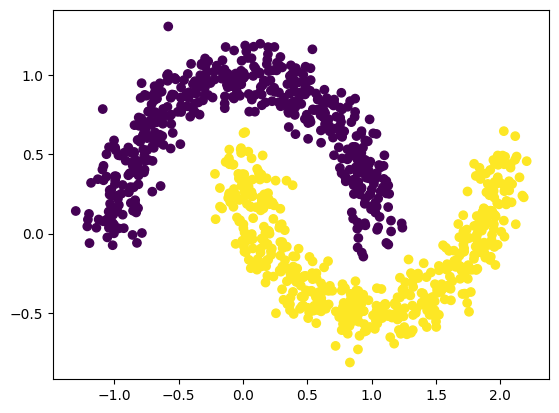

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
# split the data into train and test
train_inputs = X[:800]
train_labels = y[:800]

test_input = X[800:]
test_labels = y[800:]

In [8]:
model = Perceptron(6)
model_input = np.array([np.array([i[0], i[1], np.square(i[0]), np.square(i[1]), np.power(i[0], 3), np.power(i[1], 3)]) for i in train_inputs])
# print(model_input)
model.train(model_input, train_labels, epochs=100, learning_rate=0.01)

Epoch: 0, Error: 85
Epoch: 1, Error: 30
Epoch: 2, Error: 31
Epoch: 3, Error: 16
Epoch: 4, Error: 15
Epoch: 5, Error: 20
Epoch: 6, Error: 19
Epoch: 7, Error: 6
Epoch: 8, Error: 4
Epoch: 9, Error: 4
Epoch: 10, Error: 8
Epoch: 11, Error: 4
Epoch: 12, Error: 6
Epoch: 13, Error: 8
Epoch: 14, Error: 4
Epoch: 15, Error: 0
Epoch: 16, Error: 0
Epoch: 17, Error: 0
Epoch: 18, Error: 0
Epoch: 19, Error: 0
Epoch: 20, Error: 0
Epoch: 21, Error: 0
Epoch: 22, Error: 0
Epoch: 23, Error: 0
Epoch: 24, Error: 0
Epoch: 25, Error: 0
Epoch: 26, Error: 0
Epoch: 27, Error: 0
Epoch: 28, Error: 0
Epoch: 29, Error: 0
Epoch: 30, Error: 0
Epoch: 31, Error: 0
Epoch: 32, Error: 0
Epoch: 33, Error: 0
Epoch: 34, Error: 0
Epoch: 35, Error: 0
Epoch: 36, Error: 0
Epoch: 37, Error: 0
Epoch: 38, Error: 0
Epoch: 39, Error: 0
Epoch: 40, Error: 0
Epoch: 41, Error: 0
Epoch: 42, Error: 0
Epoch: 43, Error: 0
Epoch: 44, Error: 0
Epoch: 45, Error: 0
Epoch: 46, Error: 0
Epoch: 47, Error: 0
Epoch: 48, Error: 0
Epoch: 49, Error: 0
Epo

In [9]:
model_input = np.array([np.array([i[0], i[1], np.square(i[0]), np.square(i[1]), np.power(i[0], 3), np.power(i[1], 3)]) for i in test_input])

predicted = model.predict(model_input)

accuracy = np.sum(predicted == test_labels) / len(test_labels)
print(accuracy)


1.0


0.019999999999999997 [-0.09545789 -0.18091912 -0.24248947  0.06346249  0.17569878 -0.06525588]


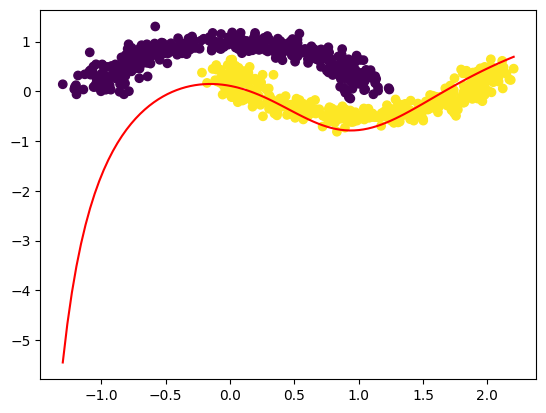

In [12]:
# visualize results
plt.scatter(train_inputs[:,0], train_inputs[:,1], c=train_labels)
x = np.linspace(train_inputs[:,0].min() , train_inputs[:,0].max() , 100)

y = (-model._bias - model._weights[0] * x - model._weights[2] * np.square(x) - model._weights[4] * np.power(x, 3)) / (model._weights[1] + model._weights[3] * x + model._weights[5] * np.power(x, 3))
print(model._bias, model._weights)
plt.plot(x, y, '-r')
plt.show()